In [5]:
import networks
from RobustVAE import RobustVAE

import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
data_dim = 2
latent_dim = 2

random_seed = 1234

encoder = networks.MLP(data_dim, latent_dim, 2, [20,20],  linear_out=True, random_seed = random_seed)
decoder = networks.MLP(latent_dim, data_dim, 2, [20,20],  linear_out=True, random_seed = random_seed)
rvae = RobustVAE(encoder, decoder)

In [17]:
n = 1000
x = np.random.normal(0,1, [n, data_dim]).astype('float32')

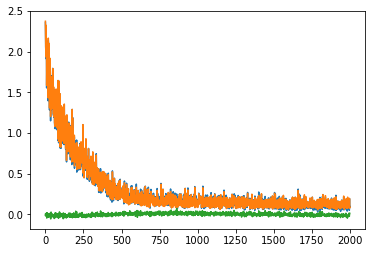

In [31]:
rvae.train(x, n_sparse = 1, iters=2000, batch_size=100, lr=1e-3)

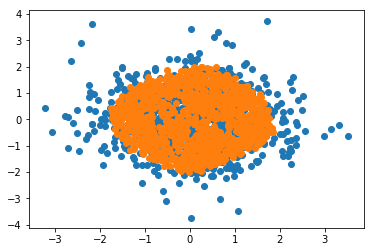

In [32]:
xhat = decoder(encoder(x))
xhat = rvae.sess.run(xhat)
plt.scatter(x[:,0], x[:,1])
plt.scatter(xhat[:,0], xhat[:,1])

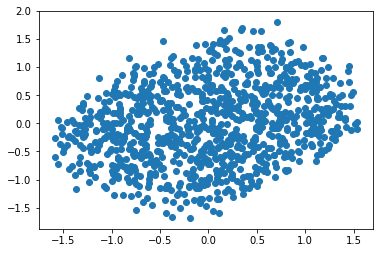

In [34]:
zhat = encoder(x)
zhat = rvae.sess.run(zhat)
plt.scatter(zhat[:,0], zhat[:,1])